In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('5challenge_training_vedantmehta08.csv', index_col = 0)

In [3]:
data.head()

,Class,Feature 0,Feature 1
0,1,0.537557,0.778545
1,0,0.207831,-0.159732
2,1,0.537384,0.414396
3,1,-0.991318,-0.517838
4,0,-1.284523,-0.246830


In [4]:
import matplotlib.pyplot as plt

In [8]:
classes = data['Class']
lst = []
for each in classes:
    if each == 0:
        lst.append('r')
    else:
        lst.append('b')

In [46]:
lst[:5]

['b', 'r', 'b', 'b', 'r']

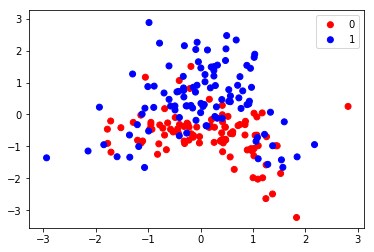

In [10]:
for (i,cla) in enumerate(set(classes)):
    xc = [p for (j,p) in enumerate(data['Feature 0']) if classes[j]==cla]
    yc = [p for (j,p) in enumerate(data['Feature 1']) if classes[j]==cla]
    cols = [c for (j,c) in enumerate(lst) if classes[j]==cla]
    plt.scatter(xc,yc,c=cols,label=cla)
plt.legend(loc=1)
plt.show()

In [11]:
data.iloc[:, 1:].describe()

,Feature 0,Feature 1
count,200.000000,200.000000
mean,0.076081,-0.085215
std,0.901771,1.040866
min,-2.938608,-3.225759
25%,-0.485169,-0.798357
50%,0.125856,-0.266771
75%,0.734966,0.527959
max,2.812718,2.880370


Looking at the statistical parameters of the features, they don't have very huge difference in the variance and the mean, so the data doesn't need scaling

Lets apply the SVC method on the final dataset

In [12]:
#Splitting the dataset into training and validation set
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], train_size = 0.75)

C:\Users\Vedant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
train_x.shape

(150, 2)

In [14]:
train_y.shape

(150,)

In [15]:
#Training SVC on the training data using RBF kernel
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

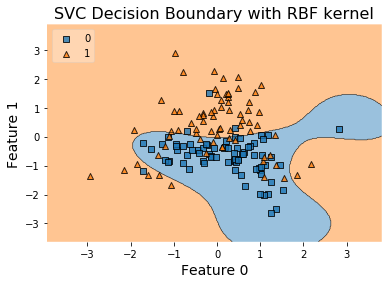

In [16]:
#PLotting the decision boundary for the RBF kernel
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=train_x.values, 
                      y=train_y.values,
                      clf=svc, 
                      legend=2)

plt.xlabel(train_x.columns[0], size=14)
plt.ylabel(train_x.columns[1], size=14)
plt.title('SVC Decision Boundary with RBF kernel', size=16)
plt.show()

In [17]:
svc.score(train_x, train_y)

0.86

Lets try increasing the penalty for misclassified data points and rebuild our decision boundary

In [18]:
svc2 = SVC(C = 4)
svc2.fit(train_x, train_y)

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

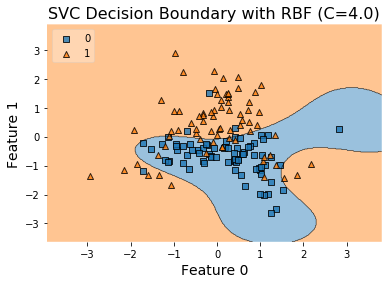

In [19]:
plot_decision_regions(X=train_x.values, 
                      y=train_y.values,
                      clf=svc2, 
                      legend=2)

plt.xlabel(train_x.columns[0], size=14)
plt.ylabel(train_x.columns[1], size=14)
plt.title('SVC Decision Boundary with RBF (C=4.0)', size=16)
plt.show()

In [20]:
svc2.score(train_x, train_y)

0.8666666666666667

There is not much significant difference in the score when cost parameter is increased

#### So lets try building the decison boundary using polynomial kernel

In [35]:
# poly_svc = SVC(kernel = 'poly', degree = 3)
# poly_svc.fit(train_x, train_y)
# poly_svc = SVC(kernel = 'poly', degree = 4)
# poly_svc.fit(train_x, train_y)
poly_svc = SVC(kernel = 'poly', degree = 5)
poly_svc.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

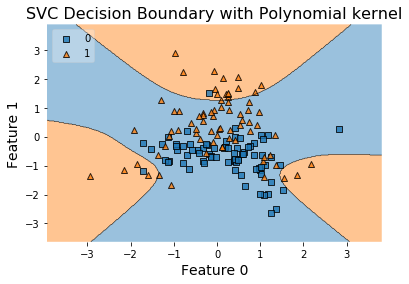

In [36]:
#Plot the decision boundary to get an idea of misclassification
plot_decision_regions(X=train_x.values, 
                      y=train_y.values,
                      clf=poly_svc, 
                      legend=2)

plt.xlabel(train_x.columns[0], size=14)
plt.ylabel(train_x.columns[1], size=14)
plt.title('SVC Decision Boundary with Polynomial kernel', size=16)
plt.show()

In [37]:
poly_svc.score(train_x, train_y)

0.64

We can try increasing the penalty for misclassified data points but it won't perform as good as the radial basis kernel

In [38]:
poly_svc2 = SVC(kernel = 'poly', C = 4, degree = 5)
poly_svc2.fit(train_x, train_y)
poly_svc2.score(train_x, train_y)

0.6466666666666666

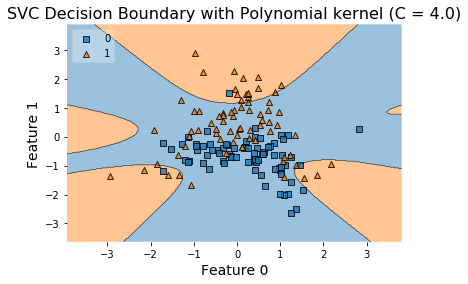

In [39]:
#Plot the decision boundary to get an idea of misclassification
plot_decision_regions(X=train_x.values, 
                      y=train_y.values,
                      clf=poly_svc2, 
                      legend=2)

plt.xlabel(train_x.columns[0], size=14)
plt.ylabel(train_x.columns[1], size=14)
plt.title('SVC Decision Boundary with Polynomial kernel (C = 4.0)', size=16)
plt.show()

### Seeing the above shown image, we get an idea that polynomial is not able to perform as good as rbf hence trying linear or sgmoid kernel won't be of use because they will perform even worse than the polynomial kernel

In [40]:
#So we will use the rbf kernel for our final prediction (without imposing any penalty)
#Predict values for the validation set and find the classification accuracy
svc.score(val_x, val_y)

0.76

In [41]:
#Import the test dataset for final predictions
test = pd.read_csv('5challenge_testing_vedantmehta08.csv', index_col = 0)

In [85]:
test.head()

,Class,Feature 0,Feature 1
0,NaN,-0.282928,0.094324
1,NaN,0.596184,-1.445355
2,NaN,-1.522742,-0.357770
3,NaN,0.798349,-1.099924
4,NaN,-0.401560,-0.506454


In [86]:
Class = pd.DataFrame(svc.predict(test.iloc[:, 1:]))

In [87]:
Class.head()

,0
0,1
1,0
2,0
3,0
4,0


In [88]:
test['Class'] = Class

In [89]:
test.head()

,Class,Feature 0,Feature 1
0,1,-0.282928,0.094324
1,0,0.596184,-1.445355
2,0,-1.522742,-0.357770
3,0,0.798349,-1.099924
4,0,-0.401560,-0.506454


In [90]:
test.to_csv('5challenge_testing_vedantmehta08.csv', index = False)

In [42]:
svc_full = SVC()

In [43]:
svc_full.fit(data.iloc[:, 1:], data.iloc[:, 0])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
svc_full.score(data.iloc[:, 1:], data.iloc[:, 0])

0.815

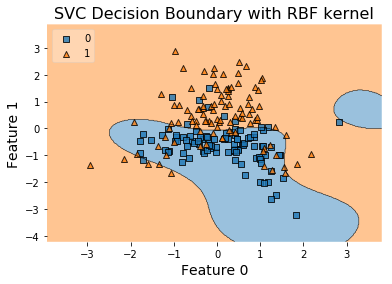

In [44]:
#Plotting the decision boundary on the full training dataset
plot_decision_regions(X=data.iloc[:, 1:].values, 
                      y=data.iloc[:, 0].values,
                      clf=svc_full, 
                      legend=2)

plt.xlabel(data.columns[1], size=14)
plt.ylabel(data.columns[2], size=14)
plt.title('SVC Decision Boundary with RBF kernel', size=16)
plt.show()

In [48]:
poly_svc_full = SVC(kernel = 'poly', degree = 5)
poly_svc_full.fit(data.iloc[:, 1:], data.iloc[:, 0])
poly_svc_full.score(data.iloc[:, 1:], data.iloc[:, 0])

0.64

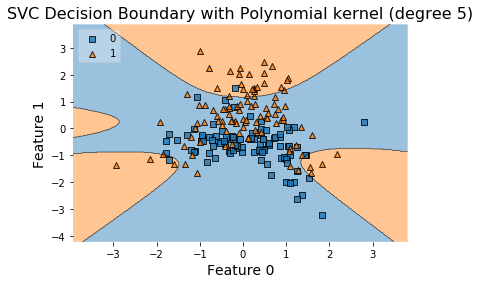

In [50]:
plot_decision_regions(X=data.iloc[:, 1:].values, 
                      y=data.iloc[:, 0].values,
                      clf=poly_svc_full, 
                      legend=2)

plt.xlabel(data.columns[1], size=14)
plt.ylabel(data.columns[2], size=14)
plt.title('SVC Decision Boundary with Polynomial kernel (degree 5)', size=16)
plt.show()